<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 201.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 187.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.8 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
duplicates = df[df.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       ResponseId                                         MainBranch  \
65437           1                     I am a developer by profession   
65438           2                     I am a developer by profession   
65439           3                     I am a developer by profession   
65440           4                              I am learning to code   
65441           5                     I am a developer by profession   
65442           6                        I code primarily as a hobby   
65443           7  I am not primarily a developer, but I write co...   
65444           8                              I am learning to code   
65445           9                        I code primarily as a hobby   
65446          10                     I am a developer by profession   
65447       18522                     I am a developer by profession   
65448       49767                        I code primarily as a hobby   
65449       51198                     I am a dev

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [9]:
## Write your code here
duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]

# Display the duplicate rows based on the selected subset of columns
print("Duplicate rows based on MainBranch, Employment, and RemoteWork:")
print(duplicates)

for name, group in duplicate_groups:
    if len(group) > 1:  # Only consider groups with more than one row (duplicates)
        identical_cols = (group.nunique() == 1).index[group.nunique() == 1].tolist()  # Identify columns with identical values
        identical_columns[name] = identical_cols

# Display which columns have identical values in duplicate rows
print("Columns with identical values in duplicate rows:")
for key, value in identical_columns.items():
    print(f"For group {key}, the following columns are identical: {value}")

Duplicate rows based on MainBranch, Employment, and RemoteWork:
       ResponseId                                         MainBranch  \
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
14             15                     I am a developer by profession   
15             16                     I am a developer by profession   
16             17                        I code primarily as a hobby   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Emplo

NameError: name 'duplicate_groups' is not defined

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


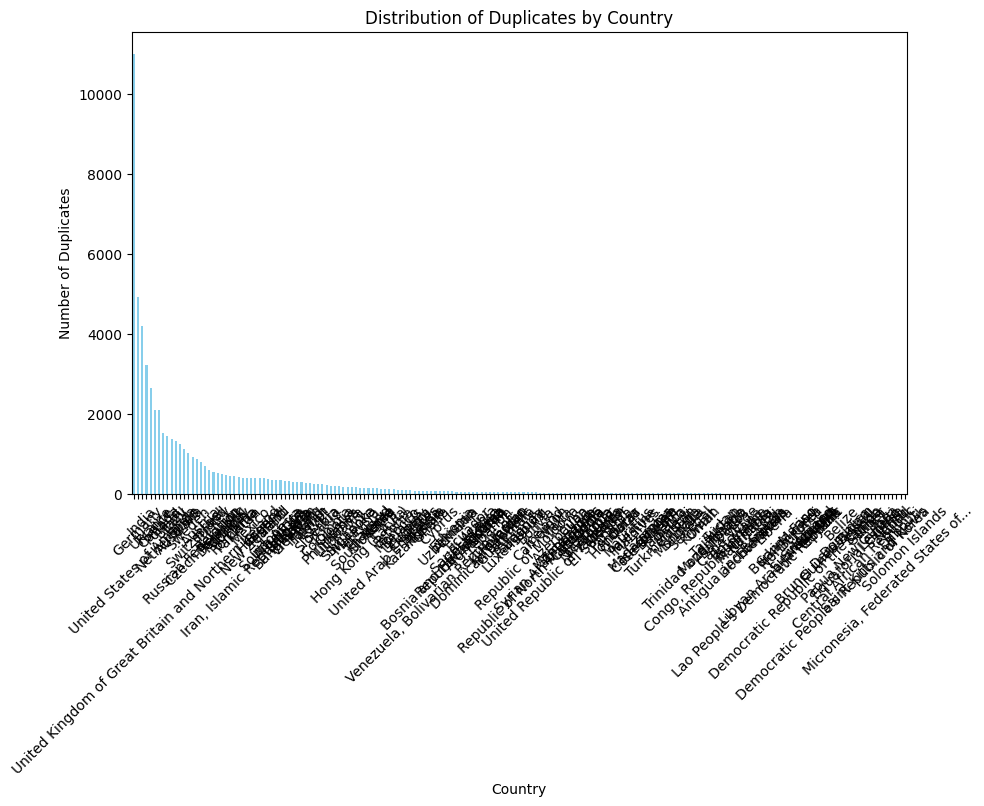

In [10]:
## Write your code here
import matplotlib.pyplot as plt

# Count the duplicates by 'Country'
duplicates_by_country = duplicates['Country'].value_counts()

# Plot the distribution of duplicates by Country
plt.figure(figsize=(10, 6))
duplicates_by_country.plot(kind='bar', color='skyblue')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [12]:
## Write your code here
# Check for the unique combinations of columns such as Country, Employment, RemoteWork
unique_combinations = df[['Country', 'Employment', 'RemoteWork']].drop_duplicates()

# Show how many unique combinations exist
print(f"Number of unique combinations based on Country, Employment, and RemoteWork: {len(unique_combinations)}")
# Remove duplicates based on 'Country', 'Employment', and 'RemoteWork'
df_cleaned = df.drop_duplicates(subset=['Country', 'Employment', 'RemoteWork'])

# Show the cleaned dataset
print(f"Number of rows after removal: {len(df_cleaned)}")
# Check the number of rows before and after removal
print(f"Number of rows before removal: {len(df)}")
print(f"Number of rows after removal: {len(df_cleaned)}")

# Display the first few rows of the cleaned dataset
print(df_cleaned.head())
# Check the number of rows before and after removal
print(f"Number of rows before removal: {len(df)}")
print(f"Number of rows after removal: {len(df_cleaned)}")

# Display the first few rows of the cleaned dataset
print(df_cleaned.head())


Number of unique combinations based on Country, Employment, and RemoteWork: 4017
Number of rows after removal: 4017
Number of rows before removal: 65457
Number of rows after removal: 4017
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contr

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
